In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
import os
import pandas as pd

np.set_printoptions(threshold=sys.maxsize) # to print the whole np array of each image

In [2]:
train_val_data_path = 'chart_images_dataset/charts/train_val'


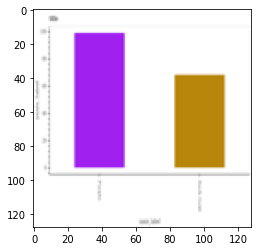

In [3]:
# checking one image from training dataset
path_of_a_chart = 'chart_images_dataset/charts/train_val/7.png'
img = load_img(path_of_a_chart)
plt.imshow(img)

In [4]:
# checking the size and pixel values of image
print("image size = {}".format(img.size))
print("image mode = {}".format(img.mode))

img_array = img_to_array(img) # converting to np array
print("image array shape = {}".format(img_array.shape))


image size = (128, 128)
image mode = RGB
image array shape = (128, 128, 3)


In [5]:
# checking if all images are of shame shape
number_of_images = 0
for filename in os.listdir(train_val_data_path):
    if filename.endswith(".png"):
        number_of_images += 1
        image_path = os.path.join(train_val_data_path, filename)
        img = load_img(image_path)
        if (img.size != (128,128)):
            print ("ImageSize different for {}".format(image_path))
        # print("image size = {}".format(img.size))
        # print("image mode = {}".format(img.mode))

print("number of images found : {}".format(number_of_images))

number of images found : 1000


Observation : all images are (128,128) RGB

In [6]:
# reading csv
csv_path = 'chart_images_dataset/charts/train_val.csv'
train_val_df = pd.read_csv(csv_path)

print (train_val_df.head())

image_index              type
0            0  vbar_categorical
1            1  vbar_categorical
2            2  vbar_categorical
3            3  vbar_categorical
4            4  vbar_categorical


In [19]:
# Using Skleran's train_test_split with 'stratify' to split training data into train and validation while keeping the proportion of classes in both of them same

train_df, val_df = train_test_split(train_val_df, train_size=0.8, shuffle=True, stratify=train_val_df['type'])

In [20]:
# checking dataframe
print(train_df.head())

image_index              type
768          768               pie
635          635               pie
90            90  vbar_categorical
287          287  hbar_categorical
147          147  vbar_categorical


In [21]:
# checking if the split maintains the class balance
categories = train_val_df['type'].unique()

for category in categories:
    print("{} has {} Train examples and {} Validation examples".format( category, (train_df['type'] ==  category).sum(), (val_df['type'] ==  category).sum()))


vbar_categorical has 160 Train examples and 40 Validation examples
hbar_categorical has 160 Train examples and 40 Validation examples
line has 160 Train examples and 40 Validation examples
pie has 160 Train examples and 40 Validation examples
dot_line has 160 Train examples and 40 Validation examples


In [22]:
# adding a 'image_filename' column
train_df['image_filename'] = train_df['image_index'].apply(lambda index: str(index) + '.png')
val_df['image_filename'] = val_df['image_index'].apply(lambda index: str(index) + '.png') 


In [23]:
train_df.head()

,image_index,type,image_filename
768,768,pie,768.png
635,635,pie,635.png
90,90,vbar_categorical,90.png
287,287,hbar_categorical,287.png
147,147,vbar_categorical,147.png


In [24]:
# saving train and validation dataframe to csv for future use
train_csv_path = 'train.csv'
val_csv_path = 'val.csv'

train_df.to_csv(train_csv_path, index= False)
val_df.to_csv(val_csv_path, index= False)


In [25]:
# checking train_csv and val_csv

testing_train_df = pd.read_csv(train_csv_path)
print(testing_train_df)

testing_val_df = pd.read_csv(val_csv_path)
print(testing_val_df)

image_index              type image_filename
0            768               pie        768.png
1            635               pie        635.png
2             90  vbar_categorical         90.png
3            287  hbar_categorical        287.png
4            147  vbar_categorical        147.png
..           ...               ...            ...
795          580              line        580.png
796          775               pie        775.png
797          944          dot_line        944.png
798          631               pie        631.png
799          698               pie        698.png

[800 rows x 3 columns]
     image_index              type image_filename
0            593              line        593.png
1            905          dot_line        905.png
2            281  hbar_categorical        281.png
3            820          dot_line        820.png
4            509              line        509.png
..           ...               ...            ...
195          752               

## Observations

* all images are (128,128) RGB
* there are 5 different types of charts
    * Each has 200 examples
* After train, validation split :
    * train has 160 examples of each type
    * validation has 40 examples of each type
